# Walks of Traces

In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../CSV/all_traces_converted.csv")
finalposition=[0]*len(df.trace)
for i in range(0, len(df.trace)):
    finalposition[i]=ast.literal_eval(df.final_position.values[i])

df["final_position"]=finalposition

admissibles=df.loc[df.admissible==True]
non_admis=df.loc[df.admissible==False]

Function to plot a given matrix via its decomposition

In [3]:
def plotmywalk(li):
    avalues=[0]*(2*len(li[0])+1)
    bvalues=[0]*(2*len(li[0])+1)
    counter=0    
    for i in range(0,len(li[0])):
        avalues[counter+1]=avalues[counter]+li[0][i]
        avalues[counter+2]=avalues[counter]+li[0][i]
        bvalues[counter+2]=bvalues[counter]+li[1][i]
        if counter+3<2*len(li[0])+1:       
            bvalues[counter+3]=bvalues[counter]+li[1][i]
        counter=counter+2
    plt.figure(figsize=(10,10))
    plt.plot(avalues, bvalues,'go-.')
    plt.plot(0,0,'ro',label="Start")
    plt.plot(avalues[len(avalues)-1],bvalues[len(bvalues)-1],'bo',label="End")
    
    plt.xlabel("Powers of $\mathcal{A}$", fontsize = 25)
    plt.ylabel("Powers of $\mathcal{B}$", fontsize = 25)
    # Also a title
    #plt.title("A plot of the walk of a walk", fontsize = 40)
    plt.legend(fontsize=10)
    plt.show()

The first portion of this notebook is if you put in a decomposition of a matrix of the form $[[a_1, a_2, ...,a_k],[b_1, b_2, ... b_k]]$ it will plot the walk for you, remember that this notation means that we are looking at the walk of the matrix $\mathcal{A}^{a_1}\mathcal{B}^{b_1}\cdots\mathcal{A}^{a_k}\mathcal{B}^{b_k}$

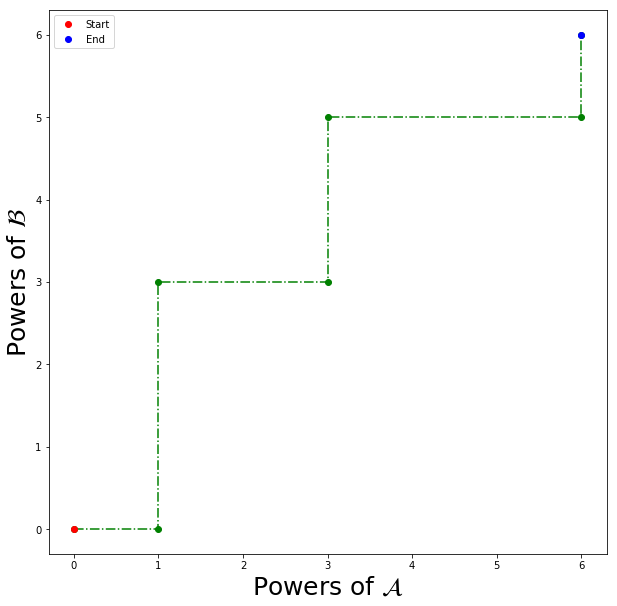

In [4]:
plotmywalk([[1,2,3],[3,2,1]])

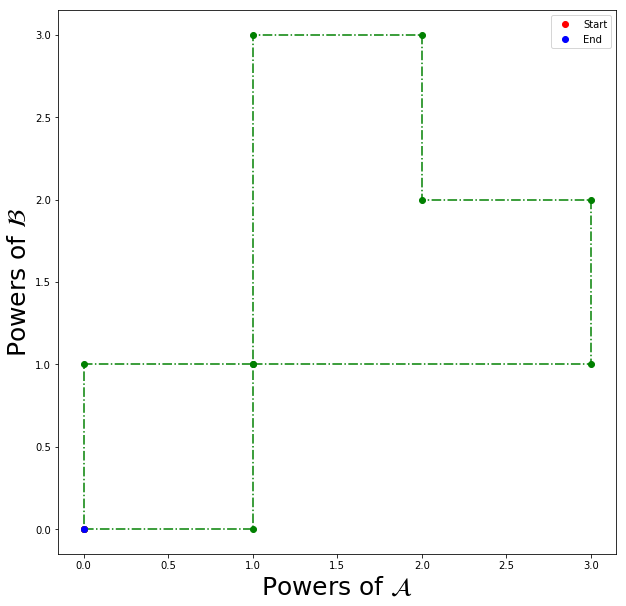

In [5]:
plotmywalk([[1,2,-1,-1,-1],[1,1,1,-2,-1]])

## Plotting the Multiplicity of points in $\mathbb{Z}^2$

In [6]:
finals=[df.final_position.values[i] for i in range(len(df))]

#finding each final position that we get
multiplicity=[]
for x in finals:
    if x not in multiplicity:
        multiplicity.append(x)
        
#counting the multiplicity of each final position        
counts=[finals.count(i) for i in multiplicity]

We can look at the set of final posititions for all of the points in our dataframe

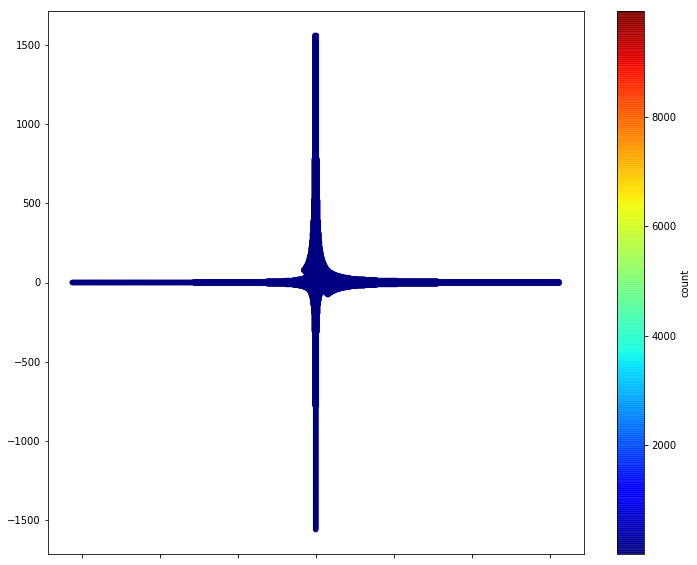

In [7]:
xpositions=[a[0] for a in multiplicity]
ypositions=[a[1] for a in multiplicity]
dataframeCreate=pd.DataFrame({"xval":xpositions,"yval":ypositions,"count":counts})
dataframeCreate.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(12,10), c="count",cmap = plt.get_cmap("jet"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)

plt.show()

We can zoom in to where the action is happening more

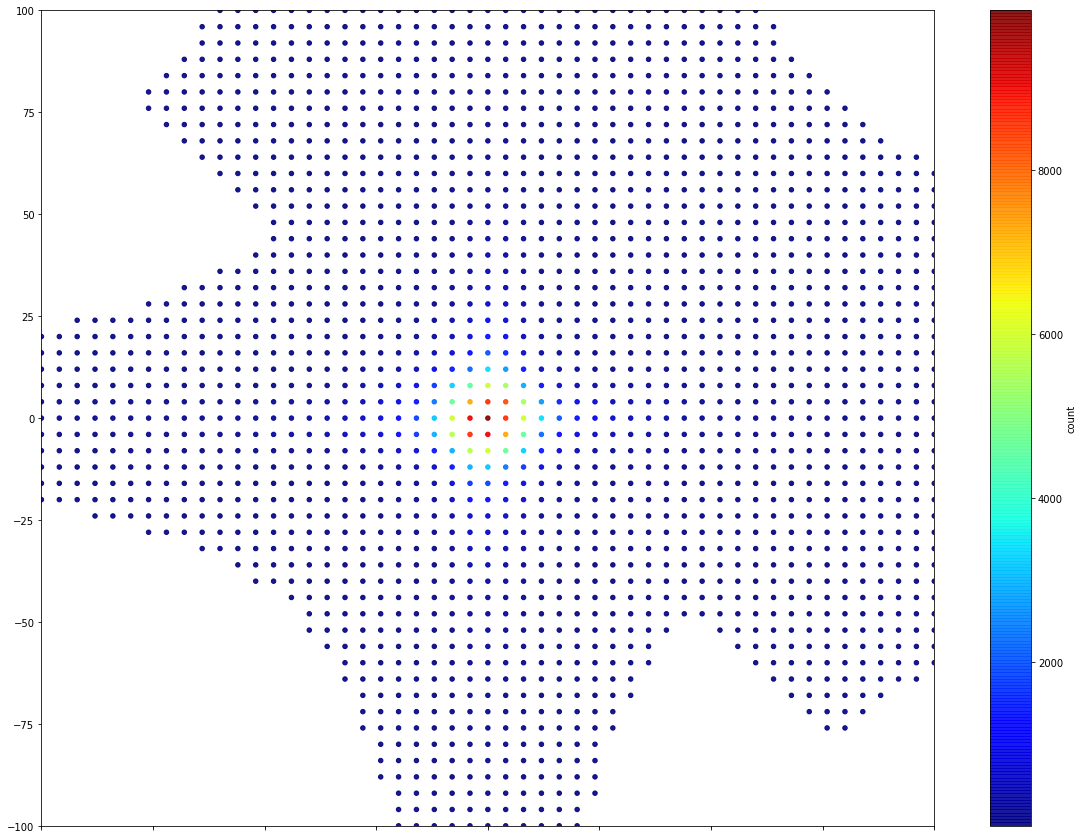

In [8]:
dataframeCreate.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("jet"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes Zoomed", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("")
plt.xlim(-100,100)
plt.ylim(-100, 100)
plt.show()

### We can just look at what happens for admissible traces

In [ ]:
finals_admis=[admissibles.final_position.values[i] for i in range(len(admissibles))]

#finding each final position that we get
multiplicity_admis=[]
for x in finals_admis:
    if x not in multiplicity_admis:
        multiplicity_admis.append(x)
        
#counting the multiplicity of each final position        
counts_admis=[finals_admis.count(i) for i in multiplicity_admis]

In [ ]:
xpositions_admis=[a[0] for a in multiplicity_admis]
ypositions_admis=[a[1] for a in multiplicity_admis]
dataframeCreate_admis=pd.DataFrame({"xval":xpositions_admis,"yval":ypositions_admis,"count":counts_admis})
dataframeCreate_admis.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("jet"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes for only admissible traces", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)

plt.show()

Looking at the only zoomed in values

In [ ]:
dataframeCreate_admis.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("jet"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes of admissibles Zoomed", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)
plt.xlim(-50,50)
plt.ylim(-50, 50)
plt.show()

### We can just look at what happens for non-admissible traces

In [ ]:
finals_non=[non_admis.final_position.values[i] for i in range(len(non_admis))]

#finding each final position that we get
multiplicity_non=[]
for x in finals_non:
    if x not in multiplicity_non:
        multiplicity_non.append(x)
        
#counting the multiplicity of each final position        
counts_non=[finals_non.count(i) for i in multiplicity_non]+[max(counts)]

In [ ]:
#an extra point is added in off the mapping to emphasise the scale between all of the pictures
xpositions_non=[a[0] for a in multiplicity_non]+[max(xpositions)+5]
ypositions_non=[a[1] for a in multiplicity_non]+[max(ypositions)+5]

dataframeCreate_non=pd.DataFrame({"xval":xpositions_non,"yval":ypositions_non,"count":counts_non})
dataframeCreate_non.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("jet"), 
             colorbar=True)

#plt.title("Heat map of the final positions of the conjugacy classes for only non-admissible traces", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)

plt.show()

In [ ]:
plt.figure(figsize=(20,10))
dataframeCreate_non.plot(kind="scatter", x = "xval", y = "yval",
             alpha = .9, figsize=(20,15), c="count",cmap = plt.get_cmap("jet"), 
             colorbar=True)
#plt.title("Heat map of the final positions of the conjugacy classes of non-admissibles Zoomed", fontsize = 40)
#plt.xlabel("x", fontsize=16)
plt.ylabel("", fontsize=16)
plt.xlim(-50,50)
plt.ylim(-50, 50)
plt.show()